# PYTORCH FUNDAMENTALS

# TENSOR

In [1]:
import torch
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

# FROM NUMPY

In [2]:
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

# THEY SHARE SAME MEMORY LOCATION

In [14]:
np.multiply(np_array,2,out=np_array)
print(np_array)
print(x_np)

[[2 4]
 [6 8]]
tensor([[2, 4],
        [6, 8]])


# FROM ANOTHER TENSOR

In [15]:
x_ones = torch.zeros_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[0, 0],
        [0, 0]]) 

Random Tensor: 
 tensor([[0.0709, 0.0118],
        [0.2944, 0.1925]]) 



# WITH RANDOM & CONSTANT VALUES

In [16]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7931, 0.3080, 0.7647],
        [0.8650, 0.1164, 0.8499]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


# SOME ATTRIBUTES

In [17]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# DEVICE

In [18]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

# INDEXING AND SLICING

In [19]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


# JOINING TENSORS

In [20]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


# ELEMENT WISE PRODUCT

In [21]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(z2)
torch.mul(tensor, tensor, out=z3)
z3

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

# MATRIX MULTIPLICATION

In [22]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

# SINGLE ELEMENT TENSOR

In [23]:
s = tensor.sum()
s_item = s.item()  
print(s_item, type(s_item))

12.0 <class 'float'>


# INPLACE OPERATIONS

In [24]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [25]:
tensor.add_(1)
print(f"t: {tensor}")

t: tensor([[7., 6., 7., 7.],
        [7., 6., 7., 7.],
        [7., 6., 7., 7.],
        [7., 6., 7., 7.]])


# LOADING DATASET

In [26]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

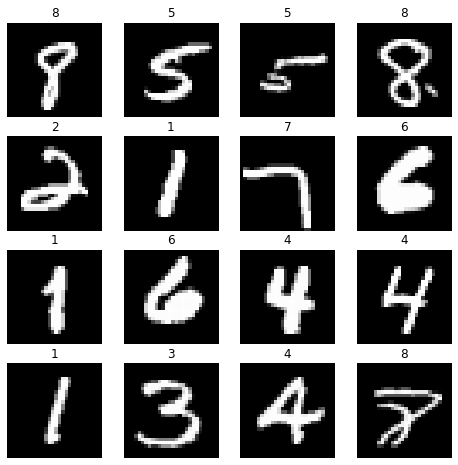

In [27]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# DATA LOADER

In [28]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# ITERATING THROUGH THE DATA

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


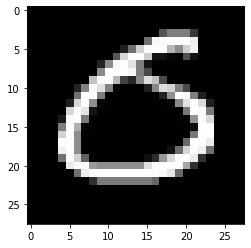

Label: 0


In [29]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# NORMALIZATION

In [30]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float)
                            .scatter_(0, torch.tensor(y), value=1))
)

# NEURAL NETWORK

In [31]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [32]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [33]:
model = NeuralNetwork()

# SOFTMAX

In [34]:
X = torch.rand(1, 28, 28)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0])


# FLATTEN

In [35]:
input_image = torch.rand(1,28,28)

In [36]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([1, 784])


# LINEAR

In [37]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([1, 20])


# ReLU

In [38]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.3030,  0.2280,  0.1214,  0.5322,  0.0512, -0.1242, -0.5010, -0.6863,
          0.5403, -0.1033,  0.8092,  0.1303,  0.4030,  0.0046, -0.0907, -0.7714,
          0.2130,  0.0788, -0.1253, -0.2958]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.2280, 0.1214, 0.5322, 0.0512, 0.0000, 0.0000, 0.0000, 0.5403,
         0.0000, 0.8092, 0.1303, 0.4030, 0.0046, 0.0000, 0.0000, 0.2130, 0.0788,
         0.0000, 0.0000]], grad_fn=<ReluBackward0>)


# SEQUENTIAL CONTAINER

In [39]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits

tensor([[-0.1297,  0.0502,  0.4691, -0.1994, -0.0269,  0.4003, -0.0917, -0.1743,
          0.0587,  0.3797],
        [-0.2861, -0.1300,  0.3920, -0.1119, -0.0233,  0.3315, -0.1950, -0.2043,
          0.0100,  0.4380],
        [-0.2028, -0.1196,  0.4841, -0.2792,  0.0577,  0.3320, -0.0804, -0.2188,
         -0.0952,  0.3046]], grad_fn=<AddmmBackward0>)

# SOFTMAX

In [40]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.0792, 0.0948, 0.1442, 0.0739, 0.0878, 0.1346, 0.0823, 0.0758, 0.0956,
         0.1318],
        [0.0711, 0.0831, 0.1400, 0.0846, 0.0924, 0.1318, 0.0778, 0.0771, 0.0956,
         0.1466],
        [0.0776, 0.0843, 0.1541, 0.0718, 0.1006, 0.1324, 0.0877, 0.0763, 0.0864,
         0.1288]], grad_fn=<SoftmaxBackward0>)

# MODEL PARAMETERS

In [41]:
print("Model structure: ", model, "\n\n")
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0152, -0.0024,  0.0334,  ..., -0.0299, -0.0257,  0.0078],
        [ 0.0303,  0.0195, -0.0178,  ...,  0.0179, -0.0182, -0.0203]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0300, -0.0083], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0026, -0.0373,  0.0115,  ..., -0.0358, -0.0167, -0.0169],
        [-0.0272, -0.0316,  0.0165,  ...,  0.0321,  0.0218,  0.0237]],
       grad_fn=<SliceBackward0>) 

Layer: linear_re

# AUTOMATIC GRADIENT

In [42]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor(2.1496, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

# GRADIENT COMPUTATION

In [43]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3045, 0.3270, 0.0145],
        [0.3045, 0.3270, 0.0145],
        [0.3045, 0.3270, 0.0145],
        [0.3045, 0.3270, 0.0145],
        [0.3045, 0.3270, 0.0145]])
tensor([0.3045, 0.3270, 0.0145])


# DISABLING GRADIENTS

In [44]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [45]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


# HYPERPARAMETERS

In [46]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

# LOSS FUNCTION

In [47]:
loss_fn = nn.CrossEntropyLoss()

# OPTIMIZER

In [48]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# THE FULL IMPLEMENTATION OF TESTING

In [49]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        pred = model(X)
        loss = loss_fn(pred, y)        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [50]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302357  [    0/60000]
loss: 2.292316  [ 6400/60000]
loss: 2.287180  [12800/60000]
loss: 2.288458  [19200/60000]
loss: 2.286114  [25600/60000]
loss: 2.281518  [32000/60000]
loss: 2.276679  [38400/60000]
loss: 2.268939  [44800/60000]
loss: 2.271695  [51200/60000]
loss: 2.258253  [57600/60000]
Test Error: 
 Accuracy: 47.9%, Avg loss: 0.035512 

Epoch 2
-------------------------------
loss: 2.256374  [    0/60000]
loss: 2.261055  [ 6400/60000]
loss: 2.254740  [12800/60000]
loss: 2.248677  [19200/60000]
loss: 2.241614  [25600/60000]
loss: 2.253411  [32000/60000]
loss: 2.235476  [38400/60000]
loss: 2.235555  [44800/60000]
loss: 2.223882  [51200/60000]
loss: 2.233332  [57600/60000]
Test Error: 
 Accuracy: 55.0%, Avg loss: 0.034718 

Epoch 3
-------------------------------
loss: 2.218984  [    0/60000]
loss: 2.208378  [ 6400/60000]
loss: 2.216266  [12800/60000]
loss: 2.211463  [19200/60000]
loss: 2.186844  [25600/60000]
loss: 2.181073  [32000/600

# SAVING THE MODEL

In [51]:
torch.save(model.state_dict(), "mnist-model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# LOADING THE MODEL

In [52]:
import torch
import onnxruntime
from torch import nn
import torch.onnx as onnx
import torchvision.models as models
from torchvision import datasets
from torchvision.transforms import ToTensor

In [53]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [54]:
model = NeuralNetwork()
model.load_state_dict(torch.load('mnist-model.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

# ONNX MODEL

In [55]:
input_image = torch.zeros((1,28,28))
onnx_model = 'mnist-onnx-model.onnx'
onnx.export(model, input_image, onnx_model)

================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [56]:
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
]
x, y = test_data[0][0], test_data[0][1]

In [75]:
session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "7", Actual: "7"


# COMPUTER VISION PLUS PYTORCH

In [4]:
#Import the packages needed.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data',
        download=True,train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',
        download=True,train=False,transform=ToTensor())

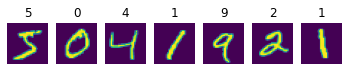

In [6]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

# DATASET ARCHITECTURE

In [8]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


# SIMPLE DENSE NETWORK

In [11]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2023-04-20 11:37:53--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.39K  --.-KB/s    in 0s      

2023-04-20 11:37:55 (30.8 MB/s) - ‘pytorchcv.py’ saved [6540/6540]



In [13]:
!pip install torchinfo

In [15]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
from pytorchcv import load_mnist, plot_results
load_mnist()

In [16]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())

# TRAIN

In [20]:
train_loader = torch.utils.data.DataLoader(data_train,batch_size=64)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=64)

In [22]:
def train_epoch(net,dataloader,lr=0.01,optimizer=None,loss_fn = nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    net.train()
    total_loss,acc,count = 0,0,0
    for features,labels in dataloader:
        optimizer.zero_grad()
        out = net(features)
        loss = loss_fn(out,labels) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
    return total_loss.item()/count, acc.item()/count
train_epoch(net,train_loader)

/home/ari-pt7127/anaconda3/lib/python3.9/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(0.005930608113606771, 0.8926833333333334)

# VALIDATE

In [25]:
def validate(net, dataloader,loss_fn=nn.NLLLoss()):
    net.eval()
    count,acc,loss = 0,0,0
    with torch.no_grad():
        for features,labels in dataloader:
            out = net(features)
            loss += loss_fn(out,labels) 
            pred = torch.max(out,1)[1]
            acc += (pred==labels).sum()
            count += len(labels)
    return loss.item()/count, acc.item()/count
validate(net,test_loader)

(0.005866207122802734, 0.8941)

In [29]:
def train(net,train_loader,test_loader,optimizer=None,lr=0.01,epochs=10,loss_fn=nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = train_epoch(net,train_loader,optimizer=optimizer,lr=lr,loss_fn=loss_fn)
        vl,va = validate(net,test_loader,loss_fn=loss_fn)
        print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f},Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
    return res
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())
hist = train(net,train_loader,test_loader,epochs=5)

Epoch  0, Train acc=0.893, Val acc=0.893,Train loss=0.006, Val loss=0.006
Epoch  1, Train acc=0.910, Val acc=0.899,Train loss=0.005, Val loss=0.006
Epoch  2, Train acc=0.913, Val acc=0.898,Train loss=0.005, Val loss=0.006
Epoch  3, Train acc=0.915, Val acc=0.897,Train loss=0.005, Val loss=0.006
Epoch  4, Train acc=0.916, Val acc=0.897,Train loss=0.005, Val loss=0.006


# PLOT

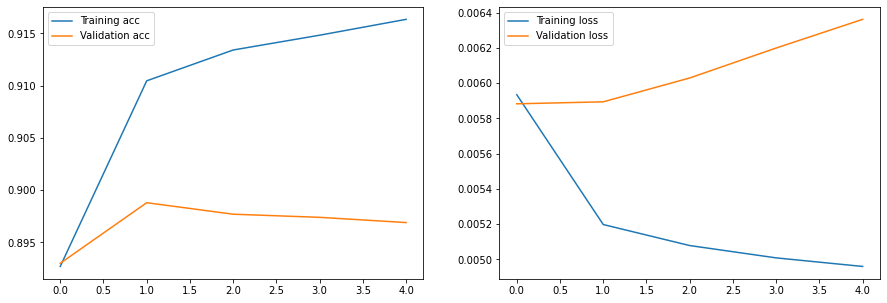

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(hist['train_acc'], label='Training acc')
plt.plot(hist['val_acc'], label='Validation acc')
plt.legend()
plt.subplot(122)
plt.plot(hist['train_loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.legend()

# MULTILAYERED PERCEPTRON

In [34]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,100),     # 784 inputs, 100 outputs
        nn.ReLU(),              # Activation Function
        nn.Linear(100,10),      # 100 inputs, 10 outputs
        nn.LogSoftmax(dim=0))

summary(net,input_size=(1,28,28))

/home/ari-pt7127/anaconda3/lib/python3.9/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/home/ari-pt7127/anaconda3/lib/python3.9/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─ReLU: 1-3                              [1, 100]                  --
├─Linear: 1-4                            [1, 10]                   1,010
├─LogSoftmax: 1-5                        [1, 10]                   --
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

# THE CLASS SYNTAX

In [36]:
from torch.nn.functional import relu, log_softmax
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(784,100)
        self.out = nn.Linear(100,10)
    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = relu(x)
        x = self.out(x)
        x = log_softmax(x,dim=0)
        return x
net = MyNet()
summary(net,input_size=(1,28,28),device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
MyNet                                    [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─Linear: 1-3                            [1, 10]                   1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

# THE CNN

In [38]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np

from pytorchcv import load_mnist, train, plot_results, plot_convolution, display_dataset
load_mnist(batch_size=128)

# DIFFERENT KERNELS

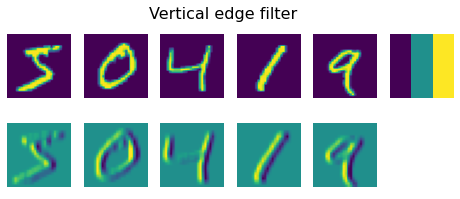

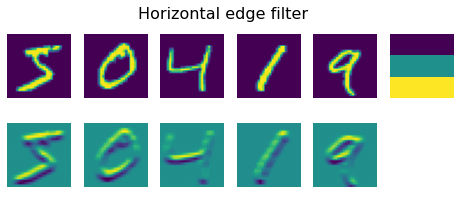

In [39]:
plot_convolution(torch.tensor([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]),'Vertical edge filter')
plot_convolution(torch.tensor([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]]),'Horizontal edge filter')


# CONVOLUTIONAL LAYER

In [ ]:
class OneConv(nn.Module):
    def __init__(self):
        super(OneConv, self).__init__()
        self.conv = nn.Conv2d(in_channels=1,out_channels=9,kernel_size=(5,5))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(5184,10)

    def forward(self, x):
        x = nn.functional.relu(self.conv(x))
        x = self.flatten(x)
        x = nn.functional.log_softmax(self.fc(x),dim=1)
        return x

net = OneConv()

summary(net,input_size=(1,1,28,28))

# TRAIN THE CNN

Epoch  0, Train acc=0.926, Val acc=0.945, Train loss=0.035, Val loss=0.034
Epoch  1, Train acc=0.950, Val acc=0.954, Train loss=0.033, Val loss=0.033
Epoch  2, Train acc=0.957, Val acc=0.954, Train loss=0.033, Val loss=0.033
Epoch  3, Train acc=0.959, Val acc=0.956, Train loss=0.033, Val loss=0.033
Epoch  4, Train acc=0.961, Val acc=0.956, Train loss=0.033, Val loss=0.033


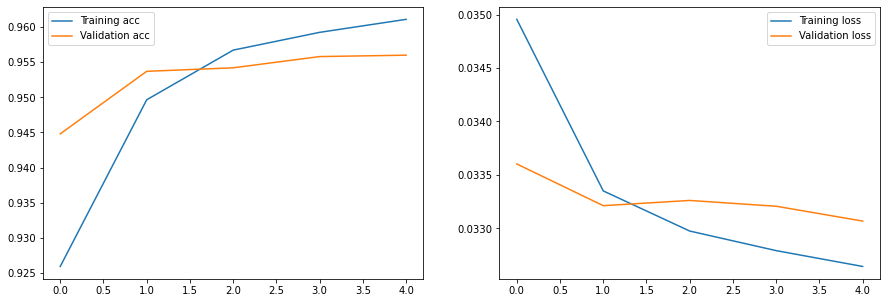

In [42]:
hist = train(net,train_loader,test_loader,epochs=5)
plot_results(hist)

# MULTILAYERED CNN

In [45]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np

from pytorchcv import load_mnist, train, plot_results, plot_convolution, display_dataset
load_mnist(batch_size=128)

In [46]:
class MultiLayerCNN(nn.Module):
    def __init__(self):
        super(MultiLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc = nn.Linear(320,10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 320)
        x = nn.functional.log_softmax(self.fc(x),dim=1)
        return x

net = MultiLayerCNN()
summary(net,input_size=(1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
MultiLayerCNN                            [1, 10]                   --
├─Conv2d: 1-1                            [1, 10, 24, 24]           260
├─MaxPool2d: 1-2                         [1, 10, 12, 12]           --
├─Conv2d: 1-3                            [1, 20, 8, 8]             5,020
├─MaxPool2d: 1-4                         [1, 20, 4, 4]             --
├─Linear: 1-5                            [1, 10]                   3,210
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
Total mult-adds (M): 0.47
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.03
Estimated Total Size (MB): 0.09

In [47]:
hist = train(net,train_loader,test_loader,epochs=5)

Epoch  0, Train acc=0.954, Val acc=0.964, Train loss=0.002, Val loss=0.002
Epoch  1, Train acc=0.978, Val acc=0.979, Train loss=0.001, Val loss=0.001
Epoch  2, Train acc=0.981, Val acc=0.983, Train loss=0.001, Val loss=0.001
Epoch  3, Train acc=0.983, Val acc=0.983, Train loss=0.001, Val loss=0.001
Epoch  4, Train acc=0.984, Val acc=0.977, Train loss=0.001, Val loss=0.001


# TRANSFER LEARNING

In [49]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import os
from pytorchcv import train, plot_results, display_dataset, train_long, check_image_dir

In [51]:
if not os.path.exists('data/kagglecatsanddogs_5340.zip'):
    !wget -P data -q https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [52]:
import zipfile
if not os.path.exists('data/PetImages'):
    with zipfile.ZipFile('data/kagglecatsanddogs_5340.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

In [53]:
check_image_dir('data/PetImages/Cat/*.jpg')
check_image_dir('data/PetImages/Dog/*.jpg')

Corrupt image: data/PetImages/Cat/666.jpg
Corrupt image: data/PetImages/Dog/11702.jpg


/home/ari-pt7127/anaconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


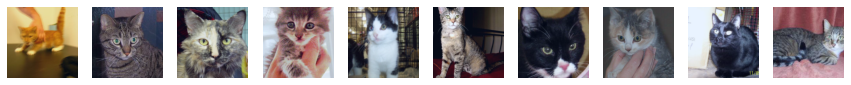

In [54]:
std_normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
trans = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(), 
        std_normalize])
dataset = torchvision.datasets.ImageFolder('data/PetImages',transform=trans)
trainset, testset = torch.utils.data.random_split(dataset,[20000,len(dataset)-20000])

display_dataset(dataset)

In [55]:
!mkdir -p models
!wget -P models https://github.com/MicrosoftDocs/pytorchfundamentals/raw/main/computer-vision-pytorch/vgg16-397923af.pth

--2023-04-20 12:46:45--  https://github.com/MicrosoftDocs/pytorchfundamentals/raw/main/computer-vision-pytorch/vgg16-397923af.pth
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/vgg16-397923af.pth [following]
--2023-04-20 12:46:45--  https://media.githubusercontent.com/media/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/vgg16-397923af.pth
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553433881 (528M) [application/octet-stream]
Saving to: ‘models/vgg16-397923af.pth’

vgg16-397923af.pth  100%[========

In [56]:
file_path = 'models/vgg16-397923af.pth'

vgg = torchvision.models.vgg16()
vgg.load_state_dict(torch.load(file_path))
vgg.eval()

sample_image = dataset[0][0].unsqueeze(0)
res = vgg(sample_image)
print(res[0].argmax())

tensor(282)


In [57]:
summary(vgg,input_size=(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [59]:
bs = 8
dl = torch.utils.data.DataLoader(dataset,batch_size=bs,shuffle=True)
num = bs*100
feature_tensor = torch.zeros(num,512*7*7)
label_tensor = torch.zeros(num)
i = 0
for x,l in dl:
    with torch.no_grad():
        f = vgg.features(x)
        feature_tensor[i:i+bs] = f.view(bs,-1)
        label_tensor[i:i+bs] = l
        i+=bs
        print('.',end='')
        if i>=num:
            break

....................................................................................................

In [61]:
vgg_dataset = torch.utils.data.TensorDataset(feature_tensor,label_tensor.to(torch.long))
train_ds, test_ds = torch.utils.data.random_split(vgg_dataset,[700,100])
train_loader = torch.utils.data.DataLoader(train_ds,batch_size=32)
test_loader = torch.utils.data.DataLoader(test_ds,batch_size=32)
net = torch.nn.Sequential(torch.nn.Linear(512*7*7,2),torch.nn.LogSoftmax())
history = train(net,train_loader,test_loader)

Epoch  0, Train acc=0.916, Val acc=0.950, Train loss=0.068, Val loss=0.082
Epoch  1, Train acc=0.981, Val acc=0.970, Train loss=0.021, Val loss=0.041
Epoch  2, Train acc=0.983, Val acc=0.970, Train loss=0.011, Val loss=0.038
Epoch  3, Train acc=0.990, Val acc=0.960, Train loss=0.011, Val loss=0.093
Epoch  4, Train acc=1.000, Val acc=0.970, Train loss=0.000, Val loss=0.043
Epoch  5, Train acc=0.999, Val acc=0.960, Train loss=0.000, Val loss=0.065
Epoch  6, Train acc=1.000, Val acc=0.960, Train loss=0.000, Val loss=0.095
Epoch  7, Train acc=1.000, Val acc=0.960, Train loss=0.000, Val loss=0.098
Epoch  8, Train acc=1.000, Val acc=0.960, Train loss=0.000, Val loss=0.099
Epoch  9, Train acc=1.000, Val acc=0.960, Train loss=0.000, Val loss=0.099


In [62]:
torch.save(vgg,'data/cats_dogs.pth')